In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Let's create a dataset
from sklearn.datasets import make_circles

# Set samples to 1000
n_samples = 1000

# Features and labels
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [3]:
X, y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64))

In [4]:
# Let's visualize the data using pandas DataFrame
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [5]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

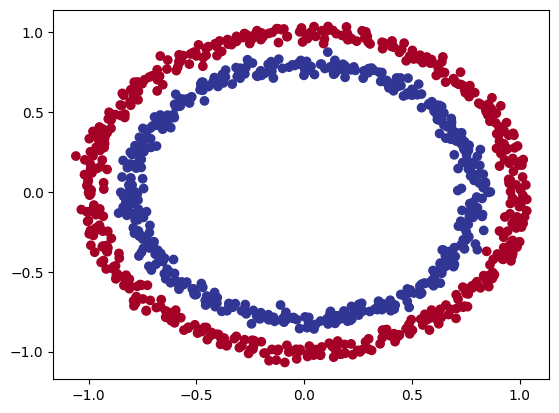

In [6]:
# Plot the data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [7]:
# Let's build a model with 2 input layer, 1 output layer, 200 epochs and adam optimizer

# Set random seed
tf.random.set_seed(42)

# 1. Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# 3. Fit the model
model.fit(X,y,epochs=200,verbose=1)

Epoch 1/200
32/32 [==============================] - 1s 1ms/step - loss: 2.8927 - accuracy: 0.4610
Epoch 2/200
32/32 [==============================] - 0s 883us/step - loss: 0.7182 - accuracy: 0.4790
Epoch 3/200
32/32 [==============================] - 0s 834us/step - loss: 0.6960 - accuracy: 0.4950
Epoch 4/200
32/32 [==============================] - 0s 724us/step - loss: 0.6985 - accuracy: 0.4910
Epoch 5/200
32/32 [==============================] - 0s 762us/step - loss: 0.6970 - accuracy: 0.4910
Epoch 6/200
32/32 [==============================] - 0s 784us/step - loss: 0.6980 - accuracy: 0.4670
Epoch 7/200
32/32 [==============================] - 0s 796us/step - loss: 0.6964 - accuracy: 0.5250
Epoch 8/200
32/32 [==============================] - 0s 830us/step - loss: 0.6957 - accuracy: 0.5110
Epoch 9/200
32/32 [==============================] - 0s 839us/step - loss: 0.6995 - accuracy: 0.5010
Epoch 10/200
32/32 [==============================] - 0s 820us/step - loss: 0.6955 - accuracy

In [8]:
model.evaluate(X,y)

32/32 [==============================] - 0s 619us/step - loss: 0.6934 - accuracy: 0.4310


[0.6933629512786865, 0.4309999942779541]

In [9]:
import numpy as np

In [10]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    """
    
    # Define the axis boundaries of the plot and create a meshgrid
    
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X values( we're going to make predictions on these)
    
    x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together
    
    # Make predictions
    y_pred = model.predict(x_in)
    
    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multiclass classificaion")
        
        # We have to reshape our prediction to get them ready for plotting 
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # Plot the decision boundary
    
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 505us/step
Doing binary classification


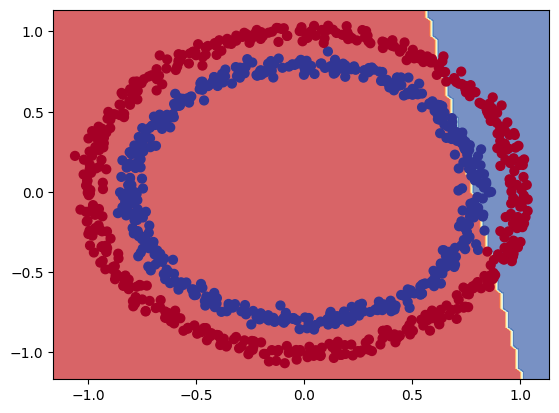

In [11]:
# Checkout the predictions our model is making
plot_decision_boundary(model=model,
                       X=X,
                       y=y)